## Assignment on Regression & Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

#### 1. Go through position_salaries.csv file and show that it is not following linear regression and can be best modelled with polynomial regression. It consists of only two fields’ position and salary.

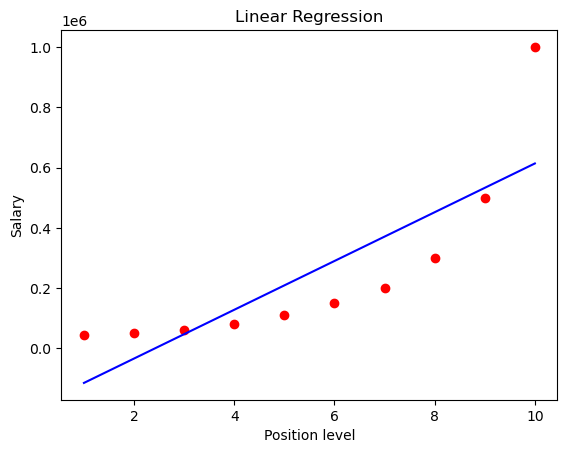

Coefficient of Determination: 0.6690412331929895


In [6]:
df1 = pd.read_csv("F:\BTech\ADV. PYTHON LAB\dataset\position_salaries.csv")
X = df1.iloc[:,1:-1].values
Y = df1.iloc[:,2:].values
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
plt.scatter(X,Y,color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
r_sq = lin_reg.score(X,Y)
print('Coefficient of Determination:', r_sq)

#### 2. Go through “Student-Pass-Fail-Data.csv" where self -study daily and tuition monthly are the two influential factors where 1 is pass and 0 is for fail. Use logistic regression and now reduce the number of rows to half and see the success rate has it influenced by the data.

In [3]:
df2 = pd.read_csv("F:\BTech\ADV. PYTHON LAB\dataset\Student-Pass-Fail-Data.csv")
df21 = df2
X = df21.drop('Pass_Or_Fail',axis = 1)
Y = df21['Pass_Or_Fail']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred = logistic_regression.predict(X_test)
print("Accuracy (%) = ",(accuracy_score(Y_test,Y_pred)) * 100)
print(confusion_matrix(Y_test,Y_pred))
print("For Half row:")
dfH = df2.head(500)
X = dfH.drop('Pass_Or_Fail',axis = 1)
Y = dfH['Pass_Or_Fail']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred = logistic_regression.predict(X_test)
print("Accuracy (%) = ",(accuracy_score(Y_test,Y_pred)) * 100)
print(confusion_matrix(Y_test,Y_pred))

Accuracy (%) =  96.8
[[120   8]
 [  0 122]]
For Half row:
Accuracy (%) =  98.4
[[62  2]
 [ 0 61]]


#### 3. Use sklearn. datasets import load_iris use k-neighbour classifier to classify the three flowers to setosa, vesicolor and Virginica.

In [4]:
df = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(df.data,df.target,
                                                    test_size=0.3,random_state=0)
clsf = KNeighborsClassifier(n_neighbors=5)
clsf.fit(X_train, Y_train)
Y_pred = clsf.predict(X_test)
print("Accuracy (%) = ",(accuracy_score(Y_test, Y_pred) * 100))
confusion_matrix(Y_test,Y_pred)

Accuracy (%) =  97.77777777777777


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

#### 4. From sklearn.datasets import make regression and fit the data and perform the linear regression. Use scatter plot.

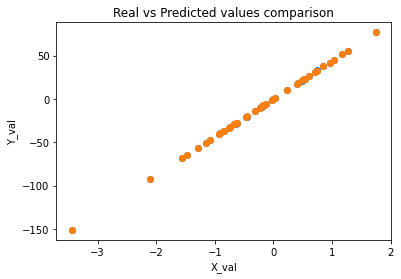

In [5]:
X,Y = make_regression(n_samples=150, n_features=1, noise=0.2)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
plt.xlabel('X_val')
plt.ylabel('Y_val')
plt.title('Real vs Predicted values comparison')
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_pred)

#### 5. Take Y = [ 5, 4, 3, 6,7, 8,9, 5,4,,3,1] , X = [ yoe, level, leow, city] such that yoe and leow isdirectly proportional to the data and level is moderately dependent and calculate R2 and equation slope and intercept for yoe, level and leow which is the best parameter.

In [6]:
yoe = np.array([3,2,1,3,4,5,5,3,2,1,1]).reshape(-1, 1)
level = np.array([2,1,0,3,4,4,5,2,1,0,0]).reshape(-1, 1)
leow = np.array([5,3,2,5,5,8,8,4,3,2,0]).reshape(-1, 1)
city = np.array([1,1,2,5,4,3,6,7,4,2,3]).reshape(-1, 1)
Y = np.array([5,4,3,6,7,8,9,5,4,3,1])
X = np.array([yoe, level, leow, city]).reshape(11,4)
model = LinearRegression()
model.fit(X, Y)
print("\nX = [yoe, level, leow, city]:")
print('R-squared: ',model.score(X,Y))
print("\nX = [yoe]:")
X = yoe
model = LinearRegression()
model.fit(X, Y)
print('R-squared: ',model.score(X,Y))
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)
b0 = (model.intercept_).round(4)
b1 = (model.coef_[0]).round(4)
print("Equation: ",b0,"+",b1,"* X ")
print("\nX = [level]:")
X = level
model = LinearRegression()
model.fit(X, Y)
print('R-squared: ',model.score(X,Y))
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)
b0 = (model.intercept_).round(4)
b1 = (model.coef_[0]).round(4)
print("Equation: ",b0,"+",b1,"* X ")
print("\nX = [leow]:")
X = leow
model = LinearRegression()
model.fit(X, Y)
print('R-squared: ',model.score(X,Y))
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)
b0 = (model.intercept_).round(4)
b1 = (model.coef_[0]).round(4)
print("Equation: ",b0,"+",b1,"* X ")


X = [yoe, level, leow, city]:
R-squared:  0.5004017672661639

X = [yoe]:
R-squared:  0.9306206088992974
Intercept:  0.8196721311475397
Slope:  [1.53278689]
Equation:  0.8197 + 1.5328 * X 

X = [level]:
R-squared:  0.9380580357142857
Intercept:  2.4375000000000004
Slope:  [1.28125]
Equation:  2.4375 + 1.2812 * X 

X = [leow]:
R-squared:  0.9525319829424307
Intercept:  1.171641791044776
Slope:  [0.9358209]
Equation:  1.1716 + 0.9358 * X 


#### 6. Take Y = [5,4,3,6,7,8,9,5,4,3] and X = [[3,2], [2,1], [1,0],[3,3],[4,4],[5,4],[5,5],[3,2],[2,1],[1,0]]. Where x0 = yoe and x1 = level. Calculate R2 and equation slope and intercept.

In [7]:
X = [[3,2],[2,1],[1,0],[3,3],[4,4],[5,4],[5,5],[3,2],[2,1],[1,0]]
Y =[5, 4, 3, 6, 7, 8, 9, 5, 4, 3]
model = LinearRegression().fit(X, Y)
print("R_Squared: ",model.score(X, Y))
print('slope: ',model.coef_)
print('intercept: ',model.intercept_)

R_Squared:  0.9845377604166666
slope:  [0.47916667 0.78125   ]
intercept:  2.291666666666665


#### 7. Take the following x = np.arange(10).reshape(-1, 1) & y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1]). Design a Logistic Regression. What value of c gives you optimum result. Modify your model till you get 100% accuracy. (c=1,5,10) show the result.

In [8]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(C=1,solver='liblinear',random_state=0)
model.fit(x, y)
print("For c = 1: ",model.predict(x))
print("Accuracy Score (%): ",round(accuracy_score(model.predict(x), y) * 100,2))
model = LogisticRegression(C=5,solver='liblinear',random_state=0)
model.fit(x, y)
print("For c = 5: ",model.predict(x))
print("Accuracy Score (%): ",round(accuracy_score(model.predict(x), y) * 100,2))
model = LogisticRegression(C=10,solver='liblinear',random_state=0)
model.fit(x, y)
print("For c = 10: ",model.predict(x))
print("Accuracy Score (%): ",round(accuracy_score(model.predict(x), y) * 100,2))

For c = 1:  [0 0 1 1 1 1 1 1 1 1]
Accuracy Score (%):  90.0
For c = 5:  [0 0 0 1 1 1 1 1 1 1]
Accuracy Score (%):  100.0
For c = 10:  [0 0 0 1 1 1 1 1 1 1]
Accuracy Score (%):  100.0
